<a href="https://colab.research.google.com/github/rabeeqasem/Thesis_code/blob/main/Data_extraction/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install geojson
#!pip install overpass
#!pip3 install networkx
#!apt install libspatialindex-dev
#!pip3 install osmnx
#!pip update matplotlib
!pip3 install overpass
!pip3 install pyproj
!pip install geocoder




     |████████████████████████████████| 6.6 MB 5.1 MB/s 
     |████████████████████████████████| 98 kB 3.0 MB/s 


In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.insert(0,'/content/drive/MyDrive/Rabee_qasem_AAUP/code')

Mounted at /content/drive


In [ ]:
class getjson():
    def getway(self,data):
        self.way=[]
        for a in range(len(data['elements'])):
            if data['elements'][a]['type']=='way':
                self.way.append(data['elements'][a]['id'])
        return self.way
    
      
    def getamenity(self,data):
      amen=[]
      try:
        for a in range(len(data['elements'])):
          if data['elements'][a]['type']=='node':
            if data['elements'][a].__contains__('tags'):
              if data['elements'][a]['tags'].__contains__('amenity'):
                if data['elements'][a]['tags']['amenity']:
                  amen.append(data['elements'][a]['id'])

      except:
        pass
      return amen


    def get_df(self,data):
        self.nodes = ['id_1','id_2']
        df=pd.DataFrame(columns=self.nodes)

        for a in range(len(data['elements'])):
            if data['elements'][a]['type']=='way':
                j=1
            #way[5701140]nodes[42807002, 8219742091, 8219737904, 42807004]
            #understand hows the nodes are linked on OSM
            for i in range(len(data['elements'][a]['nodes'])):
              if j != (len(data['elements'][a]['nodes'])):
                id_1=data['elements'][a]['nodes'][i]
                id_2=data['elements'][a]['nodes'][j]
                j=j+1
                to_append = [id_1,id_2]
                a_series = pd.Series(to_append, index = df.columns)
                df = df.append(a_series, ignore_index=True)
        return df

In [ ]:
import requests
import json
import pandas as pd 
import numpy as np
import overpass
from tqdm import tqdm
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pyproj
import json
import folium
import ee
import math
from tqdm import tqdm


#1- Overpass query

## 1.1- get the data from OSM

In [ ]:
#overpass api url
#inter the the bounding box that you need to exctract the datafrom
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json][timeout:25][bbox:41.9027,12.4520,41.9125,12.4721];
// gather results
(
  way["highway"];
  way["cycleway"];
  way['surface'];
  way['width'];
  way['lanes'];
  node['amenity'];
  node['shop'];

);
out body;
>;
out skel qt;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data_json = response.json()

## 1.2 write the data into json file 

In [ ]:
with open('data.json', 'w') as json_file:
  json.dump(data_json, json_file,indent=4)

In [ ]:
# Opening JSON file 
f = open('data.json',) 
  
# returns JSON object as  
# a dictionary 
data = json.load(f) 
  

# 2- Build the dictionary 

In [ ]:
'''
G = nx.Graph()

#Create an empty dictionary useful to easily access further information
indexed = dict()

for a in range(len(data['elements'])):
  #check the type of the object if is it way or node 
  if data['elements'][a]['type']=='way':
    #way[5701140]nodes[42807002, 8219742091, 8219737904, 42807004]
    #understand hows the nodes are linked on OSM
    for i in range(len(data['elements'][a]['nodes'])-1):
      G.add_edge(data['elements'][a]['nodes'][i],data['elements'][a]['nodes'][i+1], 
                       parent=data['elements'][a]['id'], label=data['elements'][a]['tags']['name']) 

      #print(data['elements'][a]['nodes'][i],'-',data['elements'][a]['nodes'][i+1])

  # Populate the dictionary with the json data; 
  indexed[data['elements'][a]['id']] = data['elements'][a] # Keep the Objects' information on the side. Indexed for an easy access.

      
# An example how to acess edges' information.
#print(indexed[G[42807002][8219742091]['parent']])
'''

"\nG = nx.Graph()\n\n#Create an empty dictionary useful to easily access further information\nindexed = dict()\n\nfor a in range(len(data['elements'])):\n  #check the type of the object if is it way or node \n  if data['elements'][a]['type']=='way':\n    #way[5701140]nodes[42807002, 8219742091, 8219737904, 42807004]\n    #understand hows the nodes are linked on OSM\n    for i in range(len(data['elements'][a]['nodes'])-1):\n      G.add_edge(data['elements'][a]['nodes'][i],data['elements'][a]['nodes'][i+1], \n                       parent=data['elements'][a]['id'], label=data['elements'][a]['tags']['name']) \n\n      #print(data['elements'][a]['nodes'][i],'-',data['elements'][a]['nodes'][i+1])\n\n  # Populate the dictionary with the json data; \n  indexed[data['elements'][a]['id']] = data['elements'][a] # Keep the Objects' information on the side. Indexed for an easy access.\n\n      \n# An example how to acess edges' information.\n#print(indexed[G[42807002][8219742091]['parent']])\n"

## 2.1 Dictonary creation

In [ ]:
####rabeeeeeeeeeeeeeeeeeeee
G = nx.Graph()

#Create an empty dictionary useful to easily access further information
indexed = dict()

for a in range(len(data['elements'])):
  #check the type of the object if is it way or node 
  if data['elements'][a]['type']=='way':
    #way[5701140]nodes[42807002, 8219742091, 8219737904, 42807004]
    #understand hows the nodes are linked on OSM
    for i in range(len(data['elements'][a]['nodes'])-1):
      #if not data['elements'][a]['tags'].__contains__('name'):
        #data['elements'][a]['tags']['name']='No name'
      G.add_edge(data['elements'][a]['nodes'][i],data['elements'][a]['nodes'][i+1],parent=data['elements'][a]['id']) 

      #print(data['elements'][a]['nodes'][i],'-',data['elements'][a]['nodes'][i+1])

  # Populate the dictionary with the json data; 
  indexed[data['elements'][a]['id']] = data['elements'][a] # Keep the Objects' information on the side. Indexed for an easy access.

      
# An example how to acess edges' information.
#print(indexed[G[42807002][8219742091]['parent']])

In [ ]:
#G.edges(153591704)

##2.2 calculate the distance between nodes 

In [ ]:



#https://janakiev.com/blog/gps-points-distance-python/

geod = pyproj.Geod(ellps='WGS84')

# Compute distance among the two nodes indexed[s] indexed[d] using LON and LAT
for s,d in tqdm(G.edges()):
  azimuth1, azimuth2, distance = geod.inv(indexed[s]['lon'],indexed[s]['lat'],indexed[d]['lon'],indexed[d]['lat'])
  G.edges[s,d]['weight'] = distance




100%|██████████| 3526/3526 [00:00<00:00, 75700.31it/s]


## 2.3 Graph the whole JSON file

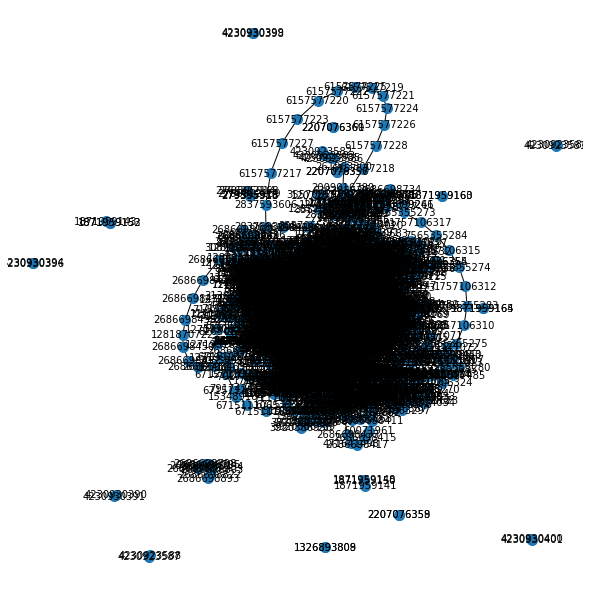

In [ ]:
# Plotting the Graph
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, node_size=100)
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.show()


##2.4 draw subgraph

In [ ]:
def draw_supgraph(node_list):
  res=node_list
  plt.figure(figsize=(8,8))
  k = G.subgraph(res)  
  pos = nx.spring_layout(k)
  edge_labels = nx.get_edge_attributes(k, 'label')
  nx.draw(k, pos, node_size=100)
  nx.draw_networkx_edge_labels(k, pos, edge_labels, font_size=8)
  nx.draw_networkx_labels(k, pos, font_size=10)
  plt.show()


In [ ]:
indexed[111991545]['nodes'].extend(indexed[111991376]['nodes'])

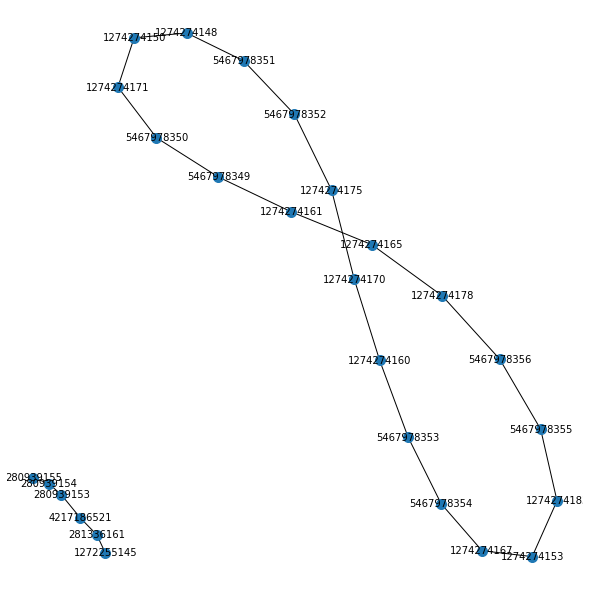

In [ ]:
draw_supgraph(indexed[111991545]['nodes'])

#3- Compute the elevation and the slop

##3.1 Earth engine authentication

**Authentication**

In [ ]:
ee.Authenticate()


To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=Jcg9G2uEMipq9eUtnbVucOeoOVnDiUQg3Chl0HRyGPI&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g4DJnF2cI3JRIz9av2ZLG_tOA4Kvf2kyrkFZiLnYG4Wxd0xda5iC4c

Successfully saved authorization token.


In [ ]:
ee.Initialize()


In [ ]:
#get the way ids from the class getjson
fj=getjson()
way_list=fj.getway(data)
amenlist=fj.getamenity(data)


## 3.2 Calcluate the distance and add it into the json file 

In [ ]:
#calcluate the distance 
for w in way_list:
  distance_list=[]
  for current,value in enumerate(indexed[w]['nodes']):
    if (current+1 < len(indexed[w]['nodes'])):
      azimuth1, azimuth2, distance = geod.inv(indexed[indexed[w]['nodes'][current]]['lon'],indexed[indexed[w]['nodes'][current]]['lat'],indexed[indexed[w]['nodes'][current+1]]['lon'],indexed[indexed[w]['nodes'][current+1]]['lat'])
      distance_list.append(distance)
      #adding the distance the the indexed
      indexed[w]['distance']=sum(distance_list)

      #adding the elevation of the slop of the road

##3.3 Calcluate the elevation and added int the json file 

This function get the elevation from EE and return the elevation  and save it into the **indexed** 

In [ ]:
def GetElevation(node):
  DEM = ee.Image("CGIAR/SRTM90_V4")
  point=ee.Geometry.Point(node)
  feats=ee.Feature(point)
  fc = ee.FeatureCollection(feats)

  # extract points from DEM
  reducer = ee.Reducer.first()
  data = DEM.reduceRegions(fc, reducer.setOutputs(['elevation']), 30)
  # see data
  for feat in data.getInfo()['features']:
    return(feat['properties']['elevation'])

In [ ]:
for i in tqdm(indexed.keys()):
  if indexed[i]['type']=='node':
    lat=indexed[i]['lat']
    lon=indexed[i]['lon']
    node=[lon,lat]
    indexed[i]['elevation']=GetElevation(node)


100%|██████████| 4708/4708 [12:01<00:00,  6.52it/s]


Calculate the slop of the road

In [ ]:
for w in tqdm(way_list):
  elevation_list=[]
  for current,value in enumerate(indexed[w]['nodes']):
    if (current+1 < len(indexed[w]['nodes'])):
      elevation_diff=indexed[indexed[w]['nodes'][current]]['elevation']-indexed[indexed[w]['nodes'][current+1]]['elevation']
      elevation_list.append(elevation_diff)
    elev_diff=max(elevation_list)-min(elevation_list)
    indexed[w]['slop']=elev_diff/indexed[w]['distance']
    indexed[w]['slop_degrees']=math.degrees(math.atan(elev_diff/indexed[w]['distance']))


100%|██████████| 939/939 [00:00<00:00, 46467.57it/s]


## 3.4 adding amenities to the way

In [ ]:
#add the distance for each amenlity on one dict
minrange = 30
for amen in amenlist:
  for w in way_list:
    for way in indexed[w]['nodes']:      
      azimuth1, azimuth2, distance = geod.inv(indexed[amen]['lon'],indexed[amen]['lat'],indexed[way]['lon'],indexed[way]['lat'])
      if(distance < minrange):
        if not indexed[w].__contains__('amenities'):
          indexed[w]['amenities']= []
        indexed[w]['amenities'].append(amen)



#4 Tracers

## 4.1 get the tracer file

In [ ]:
# Opening JSON file 
f = open('comp_tracer.json',) 
  
# returns JSON object as  
# a dictionary 
tracer = json.load(f) 

In [ ]:
#Solving the issue that keys become strings rather than numbers.
trace={}
for index,key in enumerate(tracer.keys()):
  x=int(index)
  trace[x]={'points':{},'time_dif_hour':0}
  for ind,p in enumerate(tracer[key]['points'].keys()):
    ind=int(ind)
    trace[x]['points'][ind]={}
    trace[x]['points'][ind]['lat']=tracer[key]['points'][p]['lat']
    trace[x]['points'][ind]['lon']=tracer[key]['points'][p]['lon']
  
  trace[x]['time_dif_hour']=tracer[key]['time_dif_hour']

In [ ]:
tracer.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131'])

## 4.2 add the tracer to the file 

In [ ]:
for w in tqdm(way_list):
  trid=[]
  for current,value in enumerate(indexed[w]['nodes']):
    if (current+1 < len(indexed[w]['nodes'])):

      min_lat=min(indexed[indexed[w]['nodes'][current]]['lat'],indexed[indexed[w]['nodes'][current+1]]['lat'])
      max_lat=max(indexed[indexed[w]['nodes'][current]]['lat'],indexed[indexed[w]['nodes'][current+1]]['lat'])
      min_lon=min(indexed[indexed[w]['nodes'][current]]['lon'],indexed[indexed[w]['nodes'][current+1]]['lon'])
      max_lon=max(indexed[indexed[w]['nodes'][current]]['lon'],indexed[indexed[w]['nodes'][current+1]]['lon'])

      
      for tr_number in trace.keys():
        for point in trace[tr_number]['points']:
          if (min_lat <= trace[tr_number]['points'][point]['lat'] <= max_lat) and (min_lon <= trace[tr_number]['points'][point]['lon'] <= max_lon):
            trid.append(tr_number)

  tracer_list=list(set(trid))
  tracers_speeds=[]
  for tr in tracer_list:
    if trace[tr]['time_dif_hour']!=0:
      tracespeed=abs((indexed[w]['distance']/1000)/(trace[tr]['time_dif_hour']))
      tracers_speeds.append(tracespeed)
    else:
      pass

  indexed[w]['trace_speed_list']=tracers_speeds
  indexed[w]['trace_number']=len(set(trid))



100%|██████████| 939/939 [02:20<00:00,  6.67it/s]


In [ ]:
indexed

{227543968: {'elevation': 30,
  'id': 227543968,
  'lat': 41.9056627,
  'lon': 12.4628176,
  'tags': {'amenity': 'fuel',
   'brand': 'Total Erg',
   'name': 'Erg',
   'operator': 'Grassetti Marcello',
   'ref:mise': '14019'},
  'type': 'node'},
 227544136: {'elevation': 21,
  'id': 227544136,
  'lat': 41.90355,
  'lon': 12.472028,
  'tags': {'amenity': 'fuel',
   'brand': 'Erg',
   'brand:wikidata': 'Q739503',
   'brand:wikipedia': 'it:ERG (azienda)',
   'name': 'Erg',
   'operator': 'Jayasinghe Arachchige Asanka Pushpa Kumara',
   'ref:mise': '40661'},
  'type': 'node'},
 259651864: {'elevation': 24,
  'id': 259651864,
  'lat': 41.9033087,
  'lon': 12.4587568,
  'tags': {'amenity': 'police',
   'name': 'Ispettorato Vaticano Polizia di Stato'},
  'type': 'node'},
 259653211: {'elevation': 26,
  'id': 259653211,
  'lat': 41.9035671,
  'lon': 12.4640424,
  'tags': {'amenity': 'police',
   'operator': 'Arma dei Carabinieri',
   'wheelchair': 'no'},
  'type': 'node'},
 261743538: {'elevati

In [ ]:
with open('final.json', 'w') as json_file:
  json.dump(indexed, json_file,indent=4)